In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andrisetiawan01","key":"fd436d75d66f73b3db46818529e00de4"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d mohannapd/mobile-price-prediction

  0% 0.00/19.3k [00:00<?, ?B/s]
100% 19.3k/19.3k [00:00<00:00, 21.8MB/s]


In [5]:
!mkdir mobile-price-prediction
!unzip mobile-price-prediction.zip -d mobile-price-prediction
!ls mobile-price-prediction

Archive:  mobile-price-prediction.zip
  inflating: mobile-price-prediction/Cellphone.csv  
  inflating: mobile-price-prediction/Cellphone.xlsx  
Cellphone.csv  Cellphone.xlsx


In [4]:
df = pd.read_csv('D:/uts/Cellphone.csv')

In [5]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [6]:
df.shape

(161, 14)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Product_id,161.0,675.559006,410.851583,10.0,237.0,774.00,1026.000,1339.0
Price,161.0,2215.596273,768.187171,614.0,1734.0,2258.00,2744.000,4361.0
Sale,161.0,621.465839,1546.618517,10.0,37.0,106.00,382.000,9807.0
weight,161.0,170.426087,92.888612,66.0,134.1,153.00,170.000,753.0
resoloution,161.0,5.209938,1.509953,1.4,4.8,5.15,5.500,12.2
ppi,161.0,335.055901,134.826659,121.0,233.0,294.00,428.000,806.0
cpu core,161.0,4.857143,2.444016,0.0,4.0,4.00,8.000,8.0
cpu freq,161.0,1.502832,0.599783,0.0,1.2,1.40,1.875,2.7
internal mem,161.0,24.501714,28.804773,0.0,8.0,16.00,32.000,128.0
ram,161.0,2.204994,1.609831,0.0,1.0,2.00,3.000,6.0


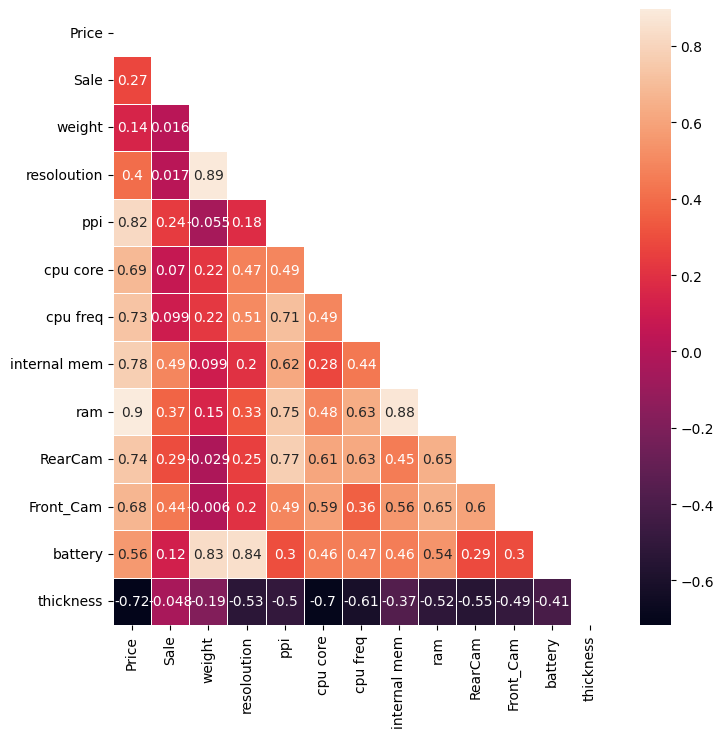

In [11]:
plt.figure(figsize=(8,8))
corr = df.drop(["Product_id"], axis =1 ).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, linewidths=.5, annot=True)
plt.show()

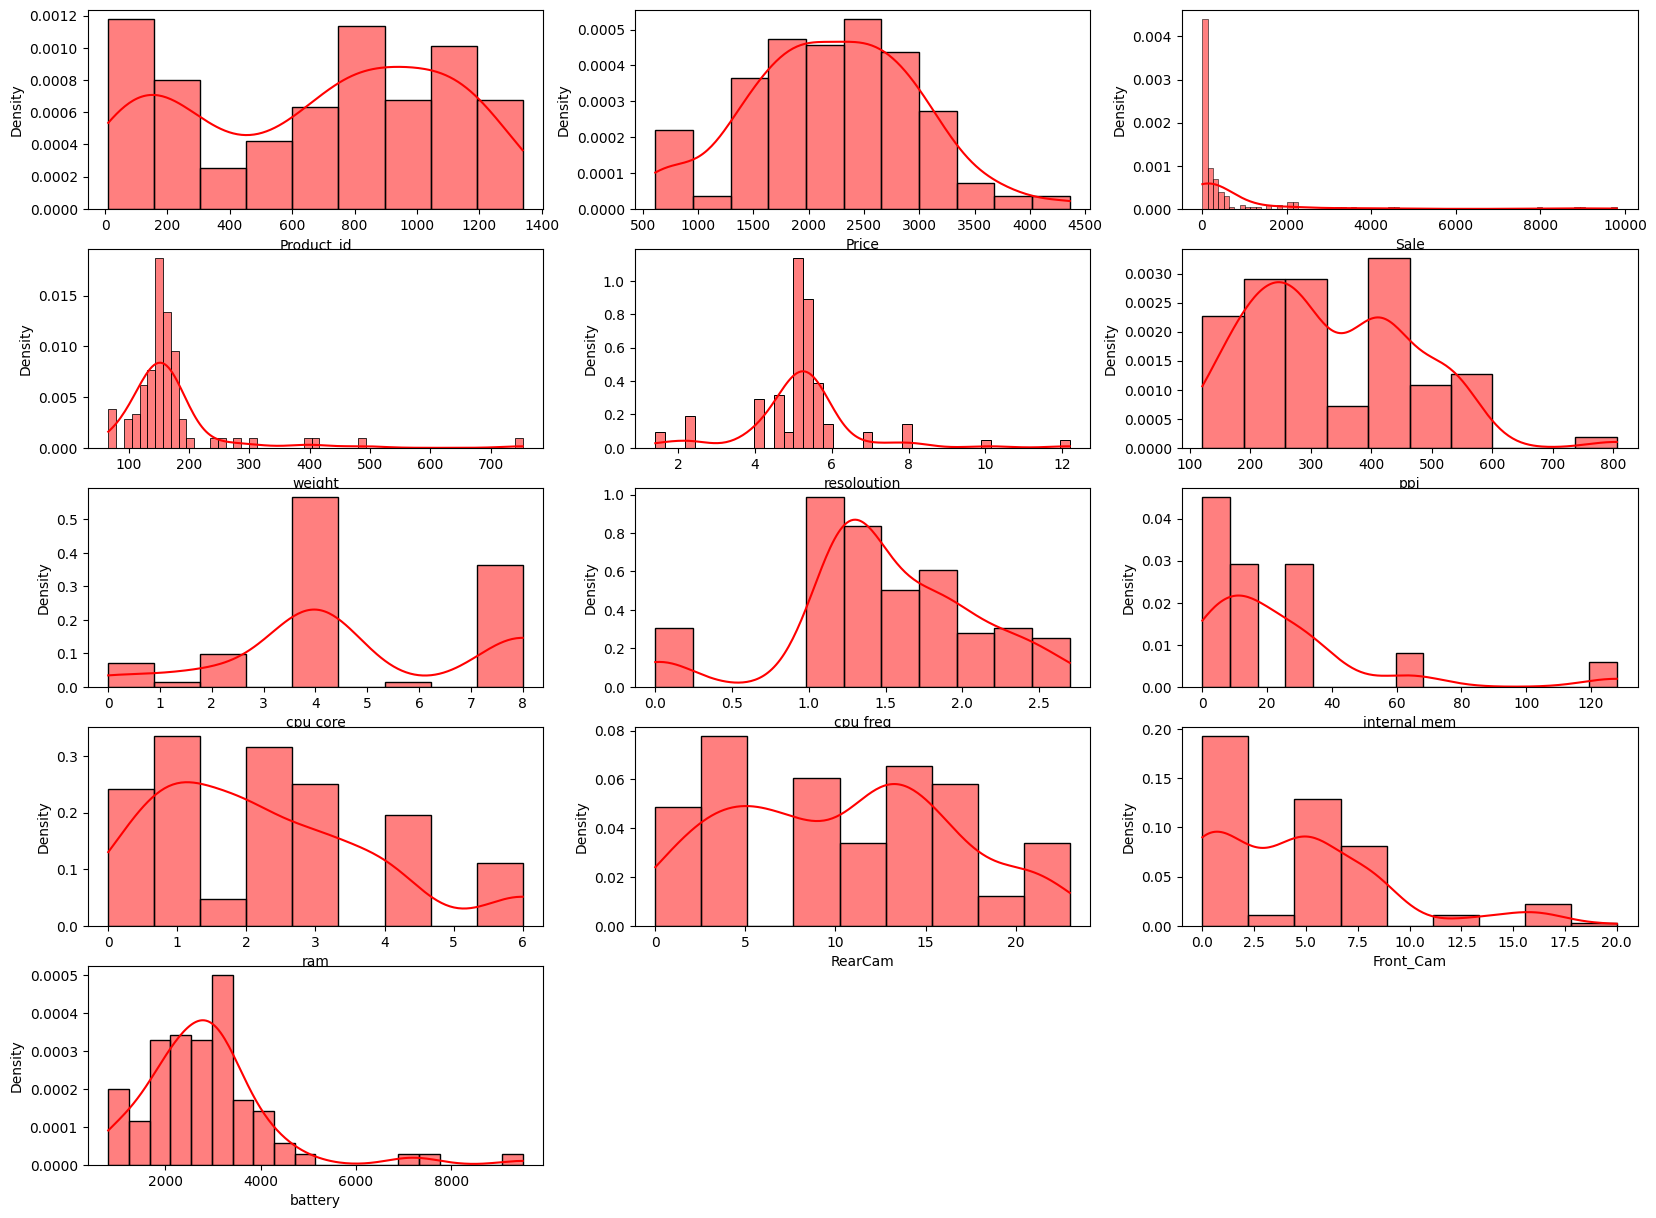

In [11]:
plt.figure(figsize=(20,15))
j = 1
for i in df.iloc[:,:-1].columns:
    plt.subplot(5,3,j)
    sns.histplot(df[i], stat = "density", kde = True , color = "red")
    j+=1
plt.show()

In [12]:
features = ['ram','cpu core','internal mem','battery','Front_Cam','RearCam','resoloution','cpu freq']
x = df[features]
y = df['Price']
x.shape, y.shape

((161, 8), (161,))

In [17]:
import pickle

filename = 'estimasi_harga_HP.sav'
pickle.dump(lr,open(filename,'wb'))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [13]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [16]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [18]:
colname = ["Product_id", "Price", "Sale", "Weight" , "Resolution", "PPI", "Cpu_Core","Cpu_Freq",
           "Internal", "RAM", "RearCam", "FrontCam", "Battery", "Thickness"]
df.columns = colname

In [19]:
df.head()

,Product_id,Price,Sale,Weight,Resolution,PPI,Cpu_Core,Cpu_Freq,Internal,RAM,RearCam,FrontCam,Battery,Thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [21]:
features = ['RAM','Cpu_Core','Internal','Battery','FrontCam','RearCam','Resolution','Cpu_Freq','Sale','Weight','PPI','Thickness']
x = df[features]
y = df['Price']
x.shape, y.shape

((161, 12), (161,))

In [22]:
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(41,)

In [23]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [24]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9313692971433055


In [25]:
input_data = np.array([[12,8,128,5000,14,56,5.1,3.6,10,185,440,8.0]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR :', prediction)

Estimasi harga mobil dalam EUR : [5134.20352128]


In [26]:
import pickle

filename = 'estimasi_harga_HP.sav'
pickle.dump(lr,open(filename,'wb'))